In [28]:
#1 Representar la matriz scatter de la velocidad y orientación del viento de los primeros mil registros.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer el archivo de datos
def leer_archivo(file_path):
    # Leer el archivo con pandas, combinando las primeras dos columnas en una sola para la marca de tiempo
    datos = pd.read_csv(file_path, delim_whitespace=True, skiprows=3, parse_dates={'Timestamp': [0, 1]}, index_col='Timestamp')
    return datos

datos =leer_archivo("model.txt")

C:\Users\juana\AppData\Local\Temp\ipykernel_18176\42798983.py:8: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  datos = pd.read_csv(file_path, delim_whitespace=True, skiprows=3, parse_dates={'Timestamp': [0, 1]}, index_col='Timestamp')
C:\Users\juana\AppData\Local\Temp\ipykernel_18176\42798983.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  datos = pd.read_csv(file_path, delim_whitespace=True, skiprows=3, parse_dates={'Timestamp': [0, 1]}, index_col='Timestamp')


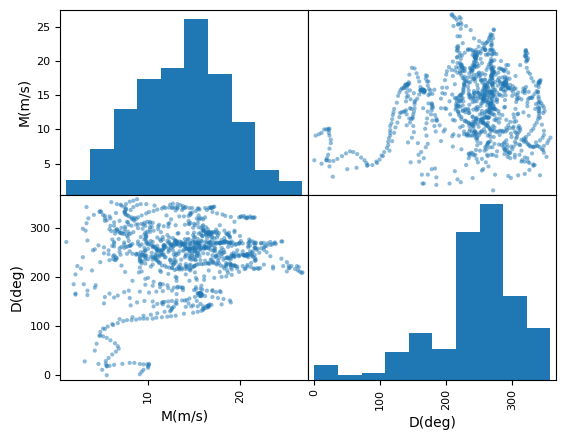

In [29]:
#2 Misma matriz scatter para los 1000 registros con mayor velocidad, ordenados.
def matriz_scatter(datos,num_registros=1000):
    # 'M(m/s)':'D(deg)': Esto indica que se deben seleccionar todas las columnas desde 'M(m/s)' hasta 'D(deg)',
    pd.plotting.scatter_matrix(datos.loc[datos.index[:num_registros], 'M(m/s)':'D(deg)'])
    plt.show()
matriz_scatter(datos)

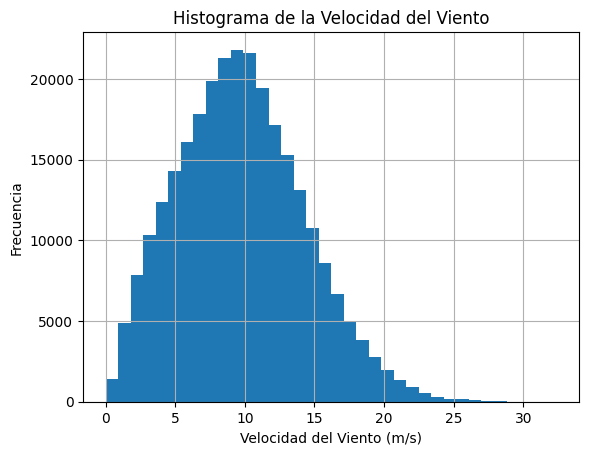

In [30]:
#3-Histograma de la velocidad del viento con 36 particiones.
# Función para representar el histograma de la velocidad del viento
def histograma_velocidad(datos, particiones=36):
    # Creamos el histograma para la columna 'M(m/s)' con el número de particiones especificado
    datos['M(m/s)'].hist(bins=particiones)
    # Añadimos el título y las etiquetas de los ejes
    plt.title('Histograma de la Velocidad del Viento')
    plt.xlabel('Velocidad del Viento (m/s)')
    plt.ylabel('Frecuencia')
    # Mostramos la gráfica
    plt.show()

# Llamada a la función con los datos
histograma_velocidad(datos)


In [33]:
#4. Histórico de la velocidad media, con los datos agrupados por años y meses.
datos['month'] = datos.index.month
datos['year'] = datos.index.year
datos.groupby(by = ['year', 'month']).mean().head(24)

M(m/s)      D(deg)       T(C)  De(k/m3)     PRE(hPa)  \
year month                                                            
1984 1      13.821505  233.603495   4.621505  1.247419   993.974328   
     2      10.043534  164.089080   3.522701  1.269368  1007.659339   
     3       8.708199  153.081989   4.138306  1.261425  1003.437231   
     4       7.939583  162.113889   6.781111  1.255986  1008.487083   
     5       8.283871  123.590054   8.034677  1.238763   998.939113   
     6       7.330833  231.652778  12.068194  1.228417  1005.009861   
     7       7.710618  222.166667  14.508199  1.219906  1006.686962   
     8       7.324194  147.930108  16.510484  1.210497  1006.095565   
     9       9.335694  231.116667  13.960000  1.210347   997.008889   
     10     10.985215  225.610215  12.109140  1.223790  1001.571505   
     11     10.789306  189.393056   9.877639  1.223389   993.419167   
     12      9.600941  213.807796   6.825000  1.253763  1006.855242   
1985 1      10.424059  157.752688   1.499059  1.269126  1000.074059   
     2       8.649851  150.980655   1.323512  1.283512  1010.598214   
     3       9.097043  190.330645   3.800000  1.259046  1000.441667   
     4      10.895833  217.081944   7.155694  1.242097   998.885694   
     5       9.147984  166.154570   9.715726  1.233145  1001.046371   
     6       8.583056  201.036111  11.734444  1.225500  1001.283194   
     7       8.865860  216.310484  15.546640  1.211720  1003.435484   
     8      10.379704  224.643817  14.996774  1.210685  1000.788306   
     9       8.181250  228.433333  14.561250  1.220333  1007.310000   
     10      8.021640  156.831989  12.262231  1.235470  1011.755645   
     11     10.734167  196.769444   5.608333  1.252042  1000.843611   
     12     12.567339  220.547043   7.274328  1.243387  1000.259409   

              RiNumber      RH(%)  
year month                         
1984 1       -2.823320  81.038575  
     2      -29.335790  83.860201  
     3        0.250726  84.740591  
     4       -1.655014  74.165417  
     5       -0.384704  87.813306  
     6       11.744944  81.090694  
     7        3.071788  78.730376  
     8        4.732742  79.204704  
     9       -6.703986  81.153889  
     10      -9.919731  83.965188  
     11    -183.106069  86.480694  
     12     -28.626452  87.389651  
1985 1      -21.708602  82.745430  
     2        1.706592  82.009226  
     3       -0.927110  87.532258  
     4       -5.238778  82.452083  
     5        6.960806  87.404570  
     6       -0.569833  82.841944  
     7        2.259113  80.224194  
     8        0.740094  80.920296  
     9       -2.072278  80.053889  
     10    -126.452137  82.420565  
     11     -18.886847  78.602639  
     12      -5.167849  88.165457

In [38]:
#5. Tabla de velocidades medias en función del año (filas) y del mes (columnas).
monthly = datos.groupby(by=['year', 'month']).mean()
monthly['ma'] = monthly.loc[:, 'M(m/s)'].rolling(5, center=True).mean()
monthly.head()

M(m/s)      D(deg)      T(C)  De(k/m3)     PRE(hPa)   RiNumber  \
year month                                                                      
1984 1      13.821505  233.603495  4.621505  1.247419   993.974328  -2.823320   
     2      10.043534  164.089080  3.522701  1.269368  1007.659339 -29.335790   
     3       8.708199  153.081989  4.138306  1.261425  1003.437231   0.250726   
     4       7.939583  162.113889  6.781111  1.255986  1008.487083  -1.655014   
     5       8.283871  123.590054  8.034677  1.238763   998.939113  -0.384704   

                RH(%)        ma  
year month                       
1984 1      81.038575       NaN  
     2      83.860201       NaN  
     3      84.740591  9.759339  
     4      74.165417  8.461204  
     5      87.813306  7.994621

<Axes: xlabel='month'>

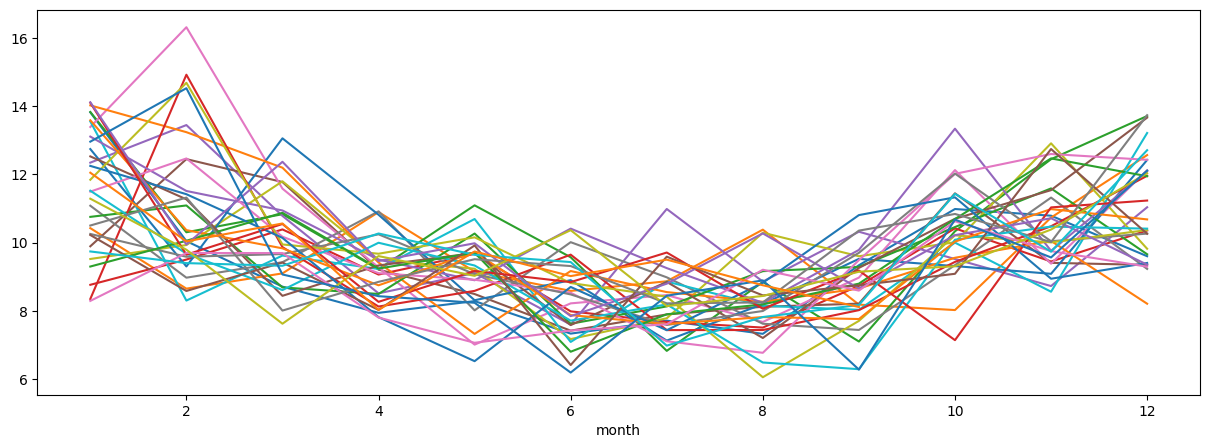

In [39]:
#6 
monthly.loc[:, 'M(m/s)'].reset_index().pivot(
    index='year', columns='month'
).T.loc['M(m/s)'].plot(
    figsize=(15, 5), legend=False
)
